## Import Packages

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

## Read File

In [14]:
data = pd.read_csv("CW_project4.txt", sep=" ", header=None)
data = data.drop(columns=6, axis=1)
data = data.rename(columns={7:6})


In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Use isolation forest to remove outliers

In [16]:
IF = IsolationForest(contamination=0.05)
outliers = IF.fit_predict(X)
X = X[outliers == -1]
y = y[outliers == -1]

## Use a DNN model plus k-fold validation(k = 10) to train model

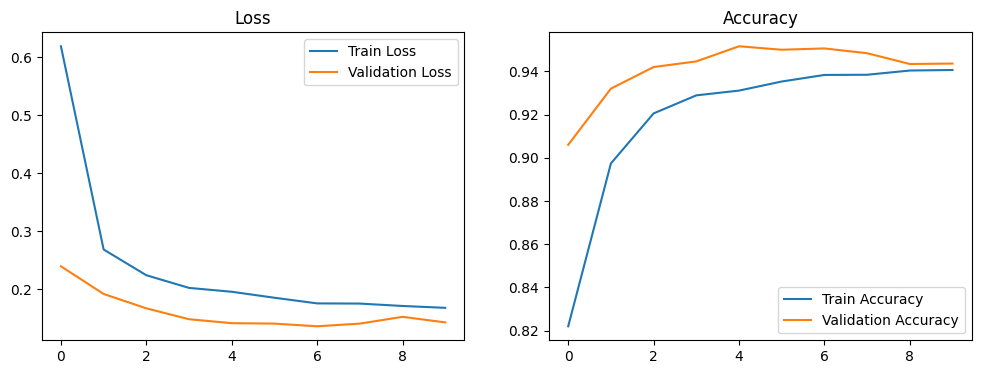

157/157 [==============================] - 0s 1ms/step


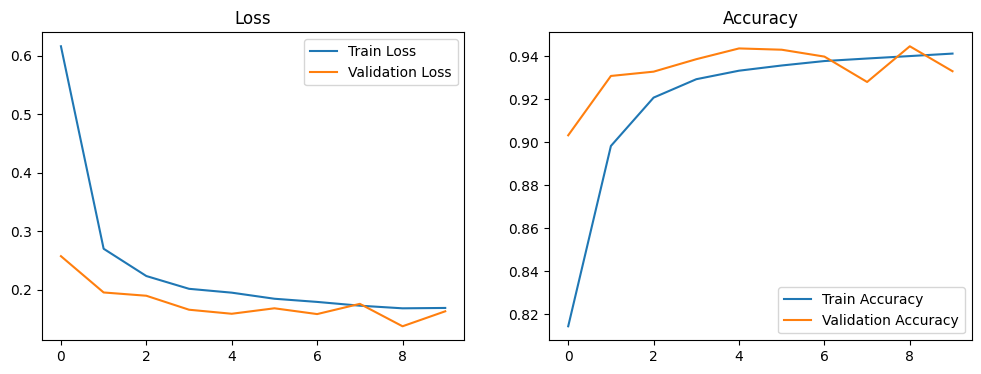

157/157 [==============================] - 0s 1ms/step


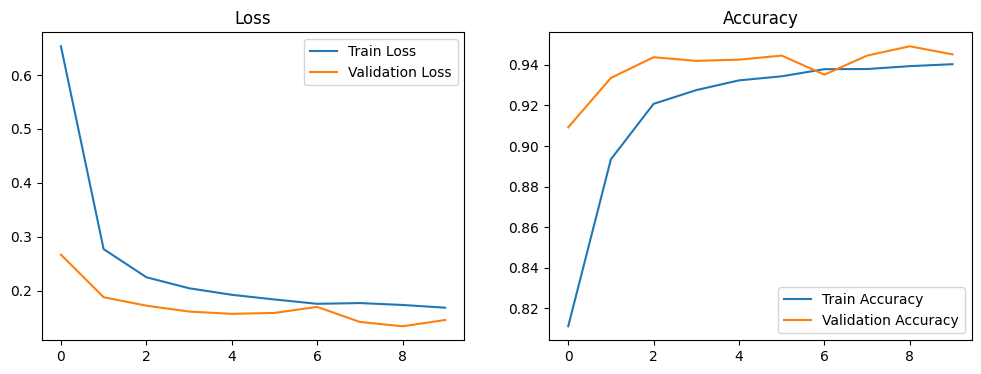

157/157 [==============================] - 0s 1ms/step


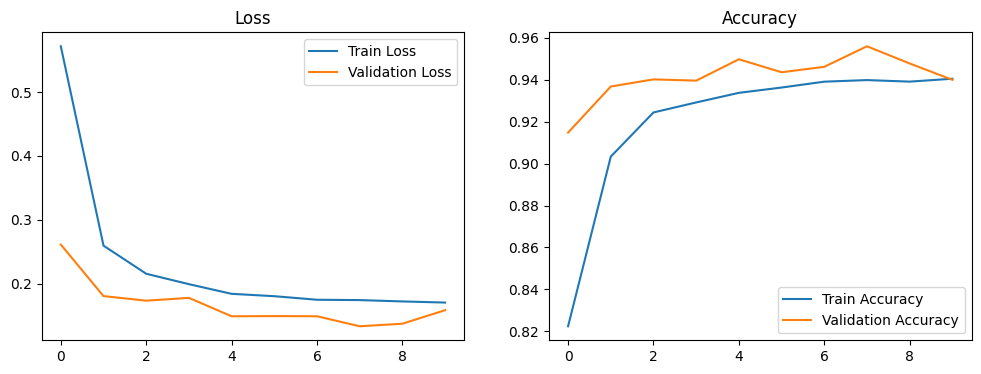

157/157 [==============================] - 0s 1ms/step


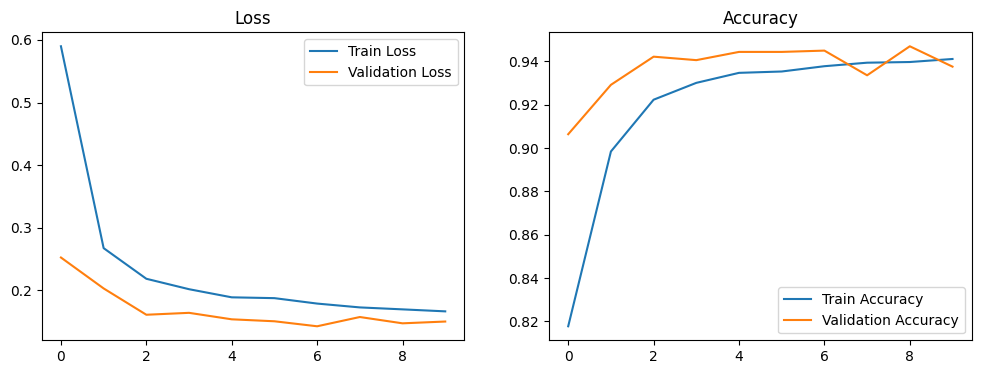

157/157 [==============================] - 0s 1ms/step


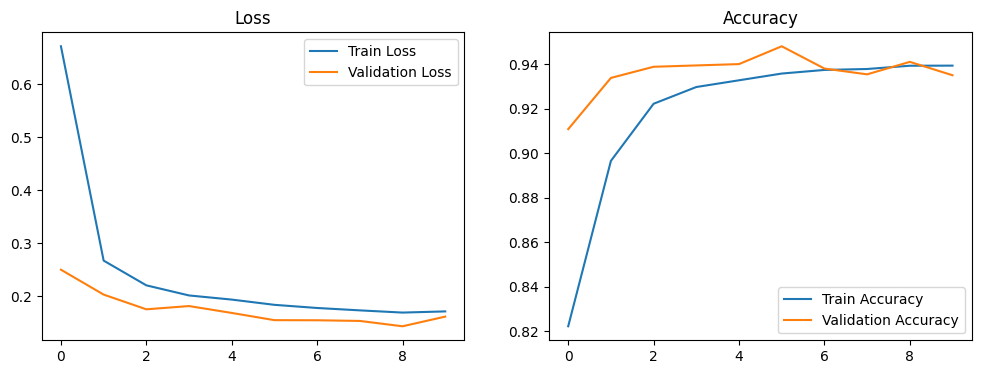

157/157 [==============================] - 0s 1ms/step


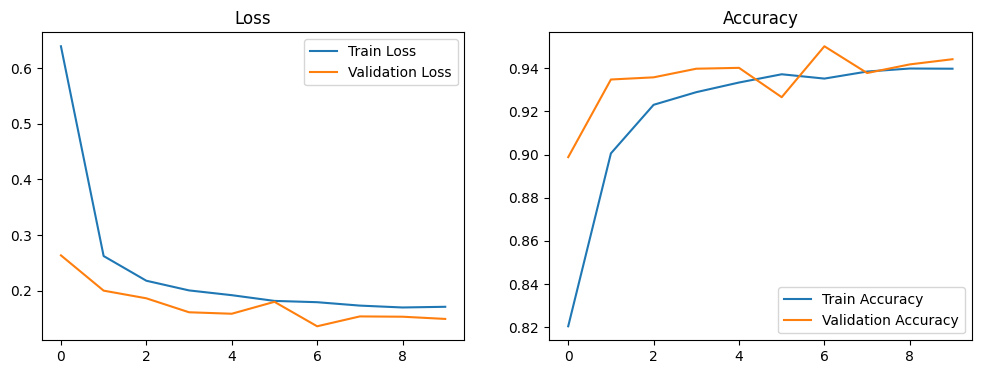

157/157 [==============================] - 0s 1ms/step


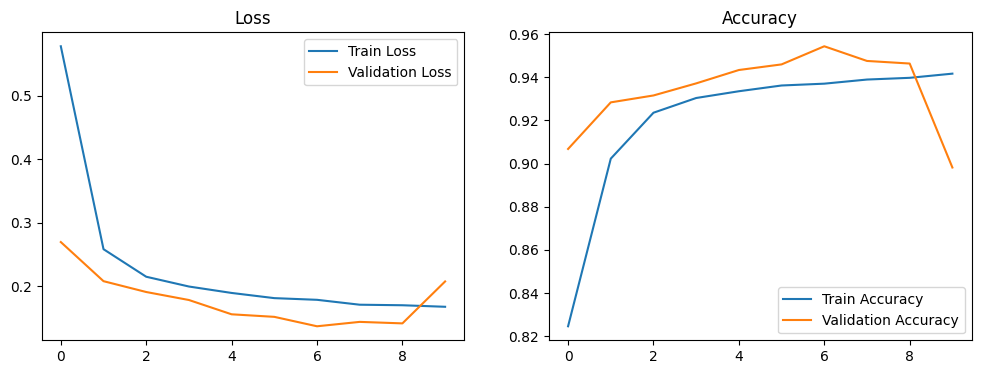

157/157 [==============================] - 0s 1ms/step


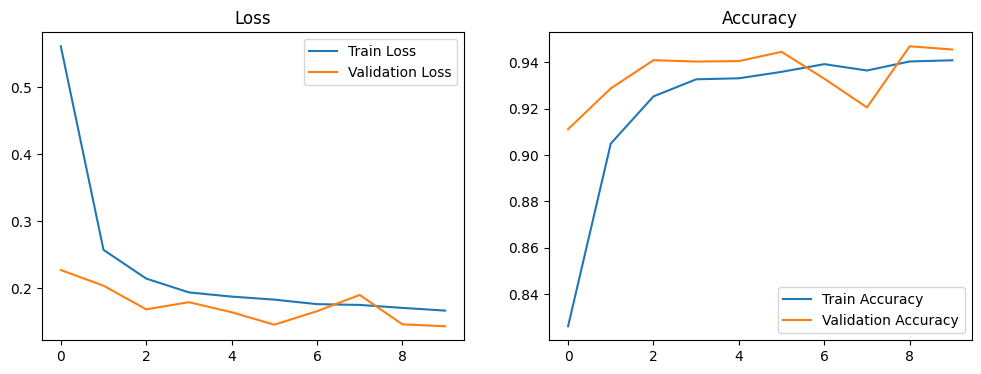

157/157 [==============================] - 0s 1ms/step


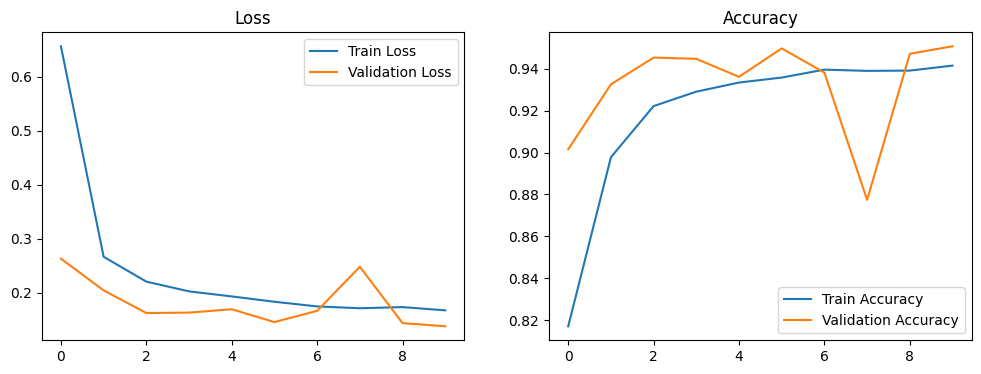

157/157 [==============================] - 0s 1ms/step
Mean validation accuracy: 0.9373


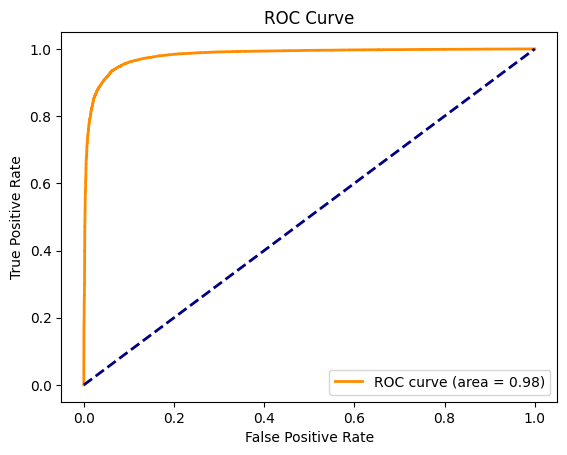

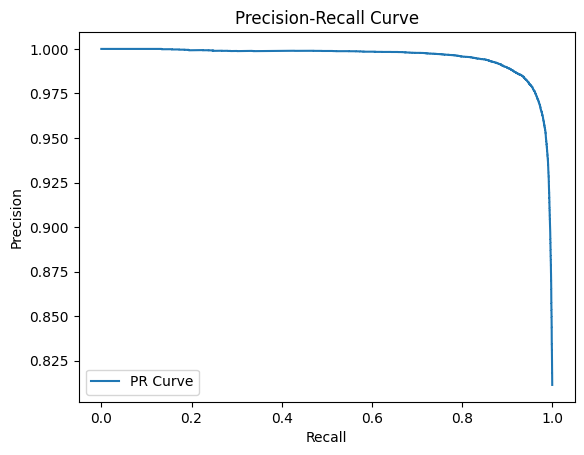

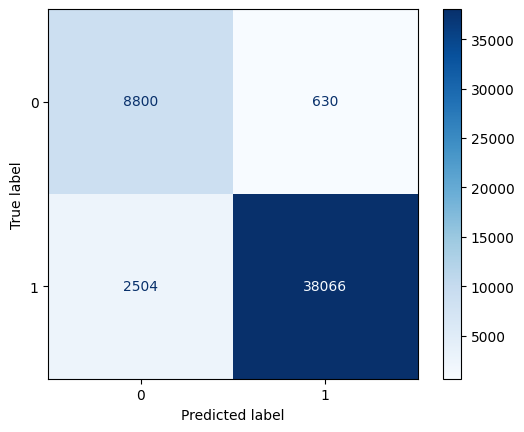

              precision    recall  f1-score   support

  background       0.78      0.93      0.85      9430
      signal       0.98      0.94      0.96     40570

    accuracy                           0.94     50000
   macro avg       0.88      0.94      0.90     50000
weighted avg       0.95      0.94      0.94     50000


In [17]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy = []
all_y_val = []
all_y_pred_val = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(6,)),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.show()
    
    y_pred_val = model.predict(X_val)
    all_y_val.extend(y_val)
    all_y_pred_val.extend(y_pred_val)
    accuracy.append(history.history['val_accuracy'][-1])

print(f"Mean validation accuracy: {sum(accuracy)/len(accuracy):.4f}")

# 在KFold循环结束后绘制ROC、PR曲线和混淆矩阵
all_y_val = np.array(all_y_val)
all_y_pred_val = np.array(all_y_pred_val).ravel()

# ROC
fpr, tpr, thresholds = roc_curve(all_y_val, all_y_pred_val)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(all_y_val, all_y_pred_val)
plt.figure()
plt.plot(recall, precision, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 混淆矩阵
matrix = confusion_matrix(all_y_val, np.round(all_y_pred_val))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

y_pred_class = np.round(all_y_pred_val)
report = classification_report(all_y_val, y_pred_class, target_names=["background", "signal"])
print(report)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   16.6s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   47.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


准确率： 0.974595
分类报告：
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    100066
           1       0.97      0.98      0.97     99934

    accuracy                           0.97    200000
   macro avg       0.97      0.97      0.97    200000
weighted avg       0.97      0.97      0.97    200000


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


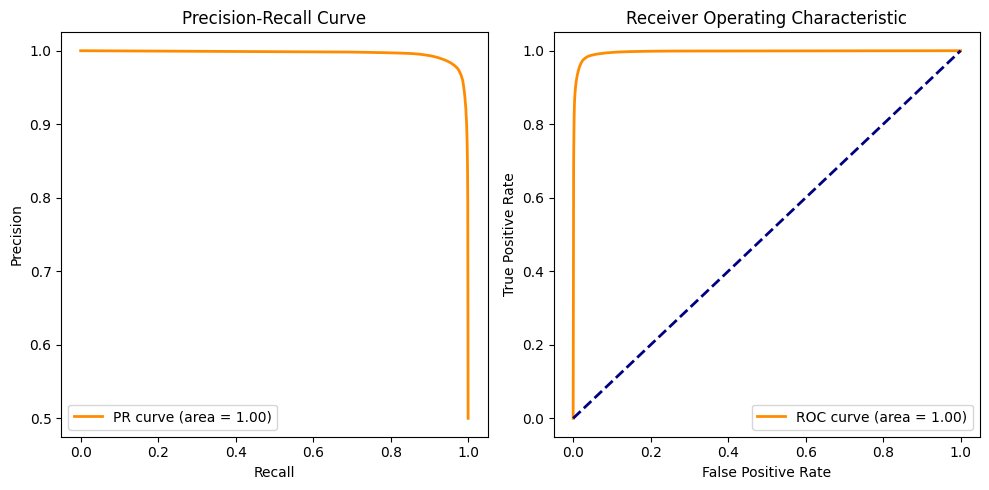

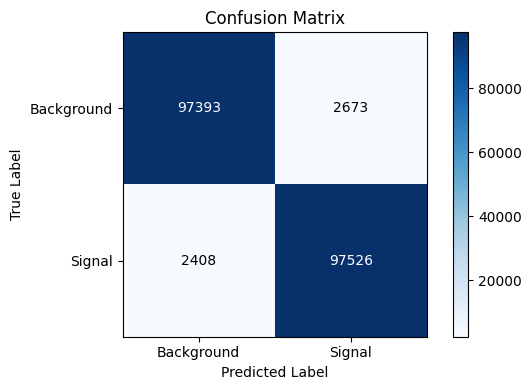

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #随机森林模型
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
# 读取文件
file_path = "CW_project4.txt"
data = np.loadtxt(file_path)

# 提取最后一列作为y
y = data[:, -1]

# 修改标签，确保只包含0或1
y_binary = (y > 0).astype(int)

# 删除最后一列
x = data[:, :-1]

#归一化（可要可不要）
# norm = MinMaxScaler()
# x=norm.fit_transform(x)

# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y_binary, train_size=0.8, test_size=0.2)

# 随机森林模型（模型在这里改）
model = RandomForestClassifier(n_estimators=100, random_state=0, verbose=2, n_jobs=4)  # 100棵树，打印状态，4个核心并行
model.fit(X_train, y_train)  # 训练模型
preds = model.predict(X_test)  # 进行预测

# 计算准确率
accuracy = accuracy_score(y_test, preds)
print("准确率：", accuracy)

# 打印分类报告，包括精确度、召回率、F1分数等
report = classification_report(y_test, preds)
print("分类报告：\n", report)

# 计算 Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# 计算 ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# 画 PR 曲线
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# 画 ROC 曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

#计算混淆矩阵
conf_matrix = confusion_matrix(y_test, preds)

# 画混淆矩阵
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Background", "Signal"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()